<h1><b>1. Importing required packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import tabletext
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import precision_recall_curve,auc,plot_confusion_matrix

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

<h1><b>2. EDA

<h2><b> 2.1 Reading data

In [ ]:
data = pd.read_csv("creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Shape of Data given :",data.shape)

Shape of Data given : (284807, 31)


In [ ]:
print("Columns present :\n\n",data.columns.values)

Columns present :

 ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<h3>So we can see all the columns has numerical data

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<h3>As we can see all the features have different distribution

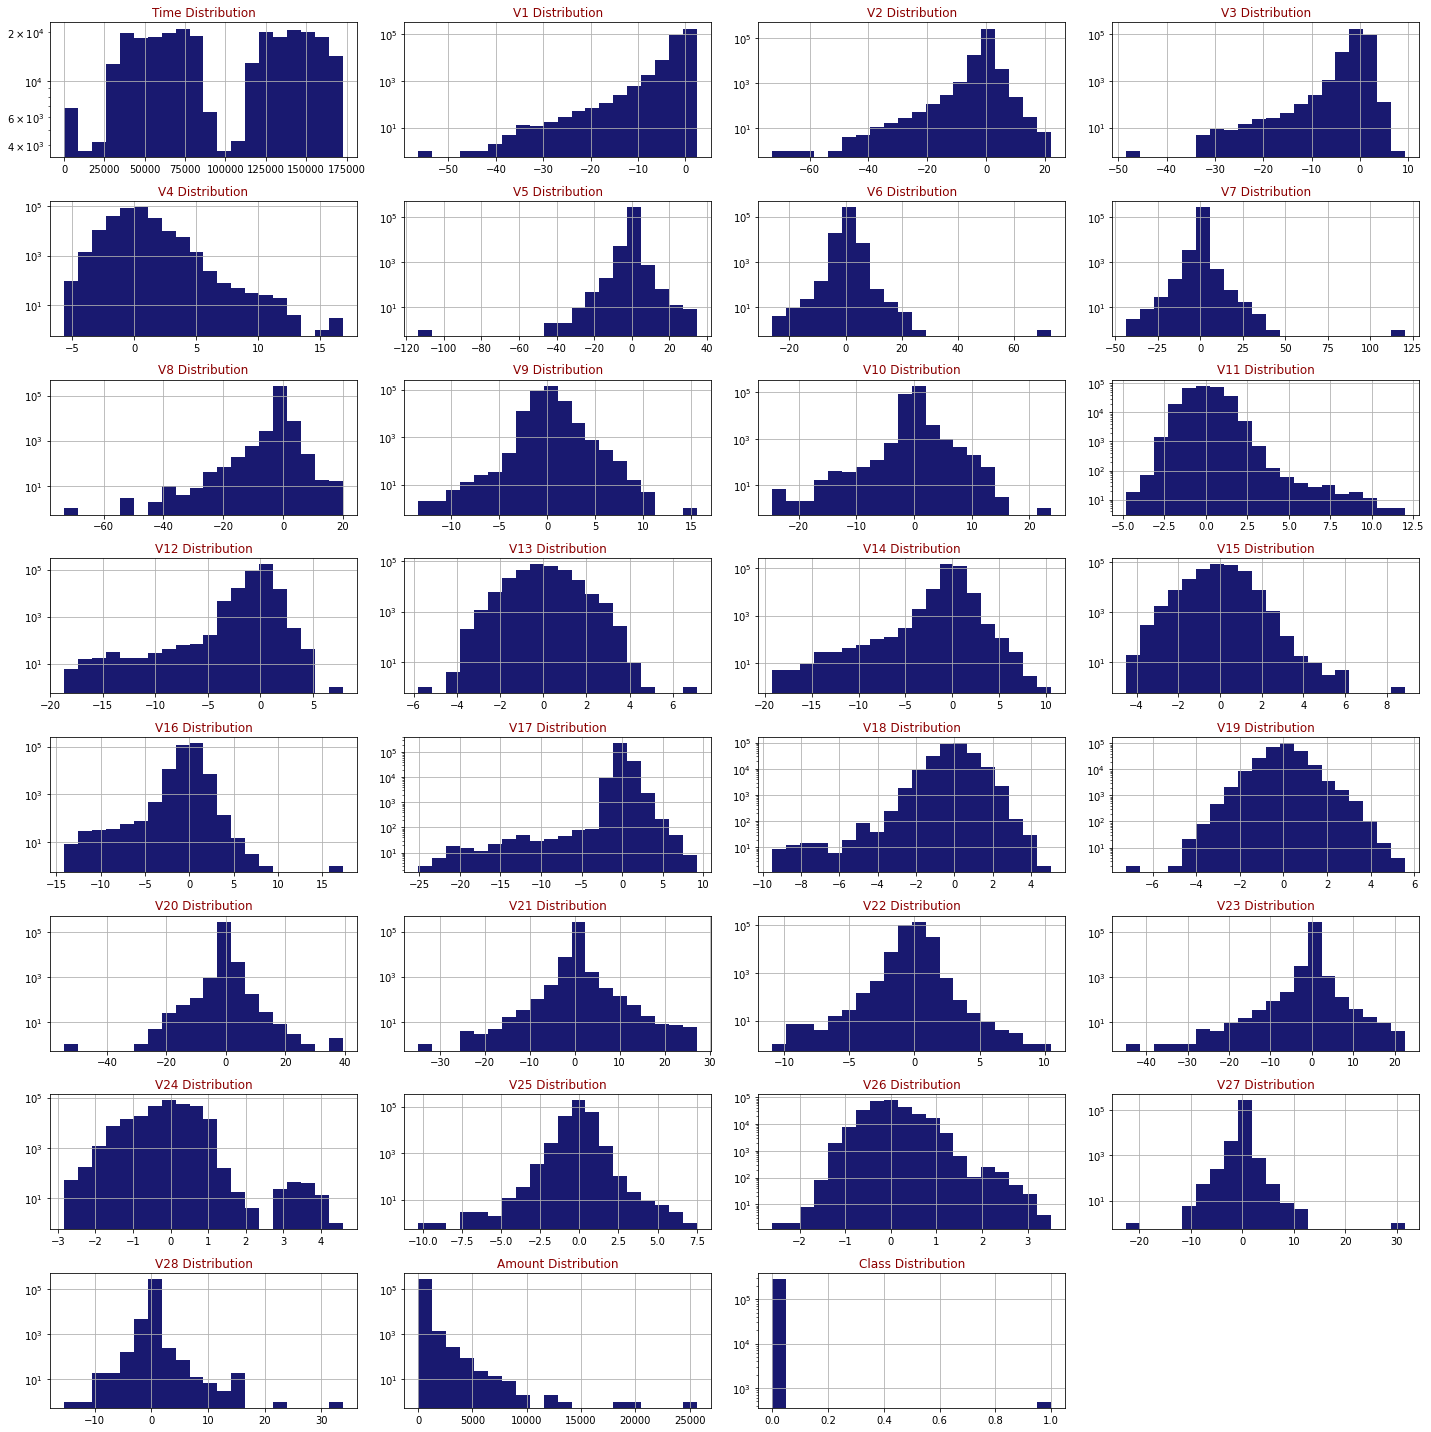

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,8,4)

<h2><b> 2.2 Checking data balancing

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
class_ratio = (data[data['Class'] == 1].shape[0]/data[data['Class'] == 0].shape[0])*100

In [ ]:
print("Percentage of positive to negative class :",class_ratio)

Percentage of positive to negative class : 0.17304750013189596


<h2><b> 2.3 Checking and Removal of null values present

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<h3>No column has null values present 

<h2><b>2.4 Checking and Removal of duplicate values

In [ ]:
#Printing Duplicate values
data[data.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,-1.440241,-0.511918,0.607878,-0.627645,1.023032,-0.888334,0.413444,1.860351,1.316597,1.094512,-0.791037,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [ ]:
#Removing duplicates
data_deduplicated = data.drop_duplicates(keep='first',inplace=False)

In [ ]:
print("Percentage of data remaining : ",data_deduplicated.shape[0]/data.shape[0])

Percentage of data remaining :  0.996204447222154


In [ ]:
data = data_deduplicated

In [ ]:
# for conserving memory
del data_deduplicated

In [ ]:
#Cross checking if any duplicate is still present
data[data.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


<h2><b>2.5 Analysing "Amount" feature

In [ ]:
data[data['Class']==1]['Amount'].describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
data[data['Class']==0]['Amount'].describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

<h3>We can clearly see that fraduelent transactions have higher value of amount compaired to other

<h2><b>2.6 Analysing Correlation of features

In [ ]:
data.corr()['Class'].abs().sort_values(ascending=False)

Class     1.000000
V17       0.313498
V14       0.293375
V12       0.250711
V10       0.206971
V16       0.187186
V3        0.182322
V7        0.172347
V11       0.149067
V4        0.129326
V18       0.105340
V1        0.094486
V9        0.094021
V5        0.087812
V2        0.084624
V6        0.043915
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
Time      0.012359
V28       0.009682
V24       0.007210
V23       0.006333
Amount    0.005777
V22       0.004887
V26       0.004265
V13       0.003897
V15       0.003300
V25       0.003202
Name: Class, dtype: float64

<h3>We can see some features like V14 has very high correlation with target but some features like V15 has very low correlation

In [ ]:
#checking for multicollinearity
((data.corr()>0.5) & (data.corr()!=1)).any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

<h3><b> 2.7 Assigning target variable

In [ ]:
target = data['Class']

In [ ]:
data.drop(['Class'],axis=1,inplace=True)

In [ ]:
feature_names = list(data.columns)

In [ ]:
feature_names

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

<h1><b>3. Applying Machine Learning Models

<h2><b>3.1 Splitting train and test data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,target, test_size=0.33, stratify=target)

In [ ]:
print("Training Data :",x_train.shape,y_train.shape)
print("Testing Data :",x_test.shape,y_test.shape)

Training Data : (190096, 30) (190096,)
Testing Data : (93630, 30) (93630,)


<h2><b>3.2 Columns standardization

In [ ]:
scalar = StandardScaler()
scaled = scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [ ]:
x_train[0,:]

array([-0.57645048, -0.21152602,  0.64011352,  0.92450354,  0.0680219 ,
        0.00797334, -0.52873529,  0.48912535,  0.06082391, -0.32027916,
       -0.50362014,  0.22033169, -0.12634379, -0.413952  , -0.30706961,
        1.28165192,  0.01756559,  0.51183263, -0.76765096, -0.70008689,
        0.05388582, -0.30036678, -0.76004483,  0.09233527,  0.55438003,
       -0.5596242 ,  0.17110763,  0.64548157,  0.29138677, -0.33388533])

<h2><b>3.3 Utility functions

In [ ]:
def batch_predict(clf, data):
  y_data_pred = []
  tr_loop = data.shape[0] - data.shape[0]%1000
  # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
  # in this for loop we will iterate unti the last 1000 multiplier
  for i in range(0, tr_loop, 1000):
    y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
  y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
  return y_data_pred

In [ ]:
def print_plot_metrics(classifier,x_train,x_test,y_true_train,y_true_test):

  y_predicted_train = classifier.predict(x_train)
  y_predicted_test = classifier.predict(x_test)

  calibrated_clfassifier = CalibratedClassifierCV(classifier, method="sigmoid")
  calibrated_clfassifier.fit(x_train, y_true_train)
  y_prob_train = batch_predict(calibrated_clfassifier,x_train)
  y_prob_test = batch_predict(calibrated_clfassifier,x_test)

  data = [['dataset','Precision','Recall','F1_Score'],
  ['Train',precision_score(y_true_train,y_predicted_train),recall_score(y_true_train,y_predicted_train),f1_score(y_true_train,y_predicted_train)],
  ['Test',precision_score(y_true_test,y_predicted_test),recall_score(y_true_test,y_predicted_test),f1_score(y_true_test,y_predicted_test)],
  ]
  print(tabletext.to_text(data))

  plot_confusion_matrix(classifier,x_train,y_true_train,values_format = '.6g')
  plt.title("Train Confusion Matrix",fontsize=30)
  plt.show()
  plot_confusion_matrix(classifier,x_test,y_true_test,values_format = '.6g')
  plt.title("Test Confusion Matrix",fontsize=30)
  plt.show()

  train_precision, train_recall, tr_thresholds = precision_recall_curve(y_true_train, y_prob_train)
  test_precision, test_recall, te_thresholds = precision_recall_curve(y_true_test, y_prob_test)
  plt.plot(train_recall,train_precision, label="train precion-recall AUC ="+str(auc(train_recall,train_precision)))
  plt.plot(test_recall,test_precision, label="test precion-recall AUC ="+str(auc(test_recall,test_precision)))
  plt.legend()
  plt.xlabel("precision")
  plt.ylabel("recall")
  plt.title("precsion-recall Curve")
  plt.grid()
  plt.show()

┌─────────┬───────────┬────────┬──────────┐
│ dataset │ Precision │ Recall │ F1_Score │
├─────────┼───────────┼────────┼──────────┤
│ Train   │       0.0 │    0.0 │      0.0 │
├─────────┼───────────┼────────┼──────────┤
│ Test    │       0.0 │    0.0 │      0.0 │
└─────────┴───────────┴────────┴──────────┘


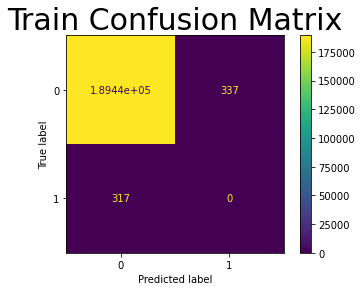

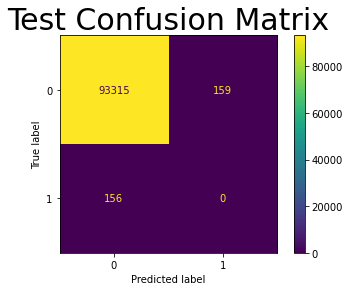

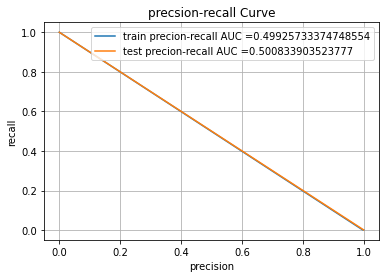

In [ ]:
dummy_model = DummyClassifier(strategy='stratified',random_state=42)
dummy_model.fit(x_train, y_train)

print_plot_metrics(dummy_model,x_train,x_test,y_train,y_test)

<h2><b>3.4 Logistic Regression

In [ ]:
start_time = datetime.now()

alpha = [10**x for x in range(-6,1)]
regularizer = ['l1','l2']

classifier = SGDClassifier(loss='log',random_state=42,class_weight='balanced')

grid_values = {'alpha':alpha,'penalty':regularizer}

randomCV = RandomizedSearchCV(classifier,param_distributions=grid_values,n_iter=6,cv=3,scoring='f1',n_jobs=-1,random_state=42,verbose=10)

randomCV.fit(x_train, y_train)

print("Score from Best params : " ,randomCV.best_score_)
print("Best params found : ", randomCV.best_params_)
print("Time taken to run this cell :", datetime.now() - start_time)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.0min finished


Score from Best params :  0.4622207650020746
Best params found :  {'penalty': 'l1', 'alpha': 1}
Time taken to run this cell : 0:04:02.664172


┌─────────┬────────────────────┬────────────────────┬────────────────────┐
│ dataset │ Precision          │ Recall             │ F1_Score           │
├─────────┼────────────────────┼────────────────────┼────────────────────┤
│ Train   │ 0.5232067510548524 │ 0.7823343848580442 │ 0.6270543615676359 │
├─────────┼────────────────────┼────────────────────┼────────────────────┤
│ Test    │ 0.5247933884297521 │ 0.8141025641025641 │ 0.6381909547738694 │
└─────────┴────────────────────┴────────────────────┴────────────────────┘


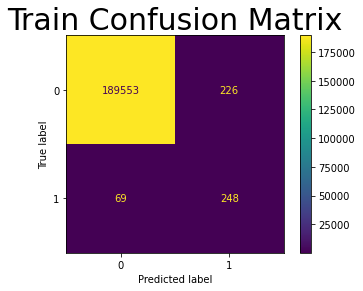

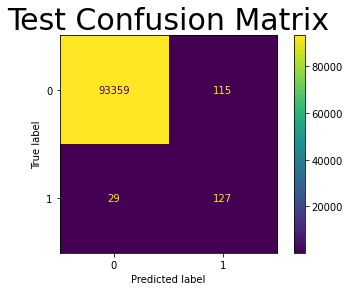

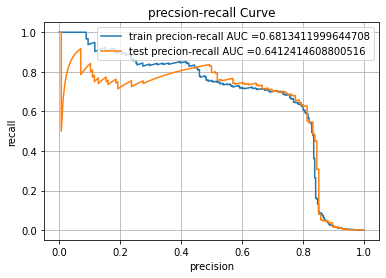

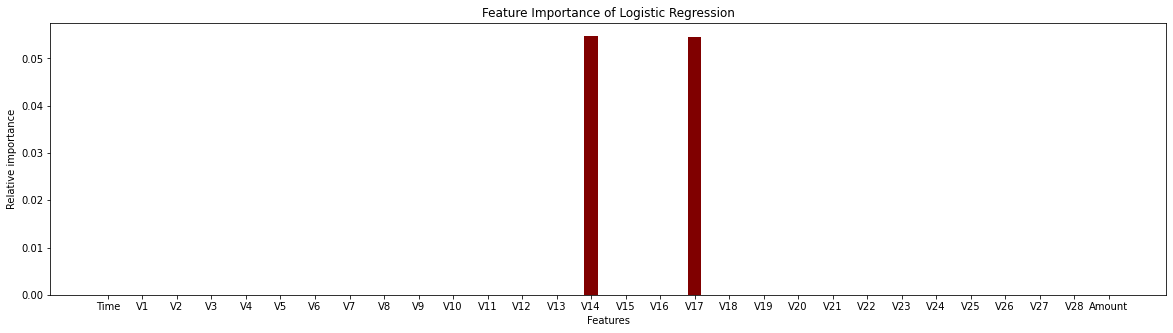

In [ ]:
classifier = SGDClassifier(penalty='l1', loss='log',alpha=1, random_state=42,class_weight='balanced')
classifier.fit(x_train,y_train)

print_plot_metrics(classifier,x_train,x_test,y_train,y_test)

fig  = plt.figure(figsize=(20,5))
plt.bar(feature_names, [abs(num) for num in list(classifier.coef_.flatten())], color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Features") 
plt.ylabel("Relative importance") 
plt.title("Feature Importance of Logistic Regression") 
plt.show()

<h2><b>3.5 Linear SVM

In [ ]:
start_time = datetime.now()

alpha = [10**x for x in range(-6,1)]
regularizer = ['l1','l2']

classifier = SGDClassifier(loss='hinge',random_state=42,class_weight='balanced')

grid_values = {'alpha':alpha,'penalty':regularizer}

randomCV = RandomizedSearchCV(classifier,param_distributions=grid_values,n_iter=6,cv=3,n_jobs=-1,scoring='f1',random_state=42,verbose=10)
randomCV.fit(x_train,y_train)

print("Score from Best params : " ,randomCV.best_score_)
print("Best params found : ", randomCV.best_params_)
print("Time taken to run this cell :", datetime.now() - start_time)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.5min finished


Score from Best params :  0.4335517824388216
Best params found :  {'penalty': 'l1', 'alpha': 1}
Time taken to run this cell : 0:03:10.103721


┌─────────┬───────────────────┬────────────────────┬────────────────────┐
│ dataset │ Precision         │ Recall             │ F1_Score           │
├─────────┼───────────────────┼────────────────────┼────────────────────┤
│ Train   │ 0.512396694214876 │ 0.7823343848580442 │ 0.6192259675405742 │
├─────────┼───────────────────┼────────────────────┼────────────────────┤
│ Test    │               0.5 │ 0.8141025641025641 │ 0.6195121951219512 │
└─────────┴───────────────────┴────────────────────┴────────────────────┘


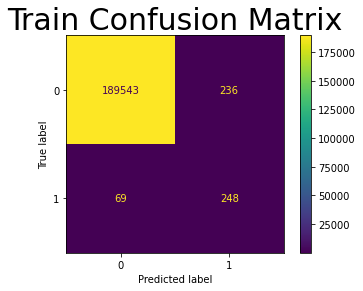

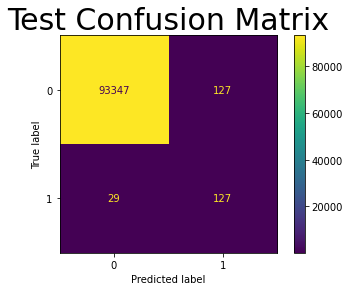

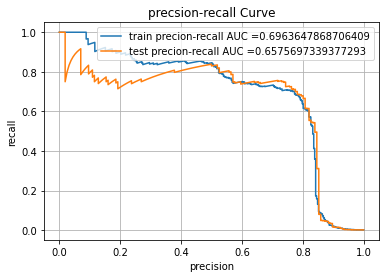

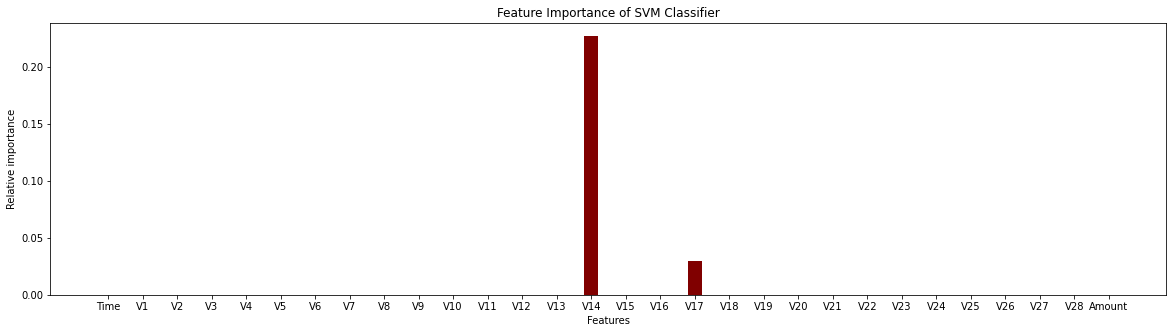

In [ ]:
classifier = SGDClassifier(penalty='l1', loss='hinge',alpha=1, random_state=42,class_weight='balanced')
classifier.fit(x_train,y_train)

print_plot_metrics(classifier,x_train,x_test,y_train,y_test)

fig  = plt.figure(figsize=(20,5))
plt.bar(feature_names,[abs(num) for num in list(classifier.coef_.flatten())], color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Features") 
plt.ylabel("Relative importance") 
plt.title("Feature Importance of SVM Classifier") 
plt.show()

<h2><b>3.6 RandomForest

In [ ]:
start_time = datetime.now()

n_estimators = [4,8,16,32,64,100,200]
max_depth = [2,5,10,15,20,30]
max_samples = [0.1,0.2,0.3]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
max_features = ['sqrt','log2']

random_grid = {
    'n_estimators':n_estimators,
    'max_depth' : max_depth,
    'max_samples' : max_samples,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features
}

classifier = RandomForestClassifier(class_weight='balanced',n_jobs=-1)

randomCV = RandomizedSearchCV(classifier, param_distributions = random_grid, n_iter = 100, cv = 3,scoring = 'f1',n_jobs=-1,verbose
=10, random_state=42)

randomCV.fit(x_train, y_train)

print("Score from Best params : " ,randomCV.best_score_)
print("Best params found : ", randomCV.best_params_)
print("Time taken to run this cell :", datetime.now() - start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 10

Score from Best params :  0.8099981193687918
Best params found :  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_samples': 0.3, 'max_features': 'sqrt', 'max_depth': 15}
Time taken to run this cell : 0:21:01.999299


┌─────────┬────────────────────┬───────────────────┬────────────────────┐
│ dataset │ Precision          │ Recall            │ F1_Score           │
├─────────┼────────────────────┼───────────────────┼────────────────────┤
│ Train   │ 0.8823529411764706 │ 0.804416403785489 │ 0.8415841584158417 │
├─────────┼────────────────────┼───────────────────┼────────────────────┤
│ Test    │ 0.8531468531468531 │ 0.782051282051282 │ 0.8160535117056855 │
└─────────┴────────────────────┴───────────────────┴────────────────────┘


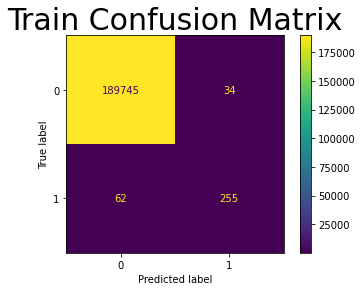

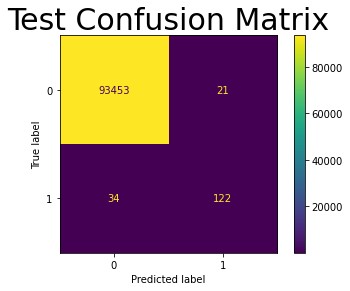

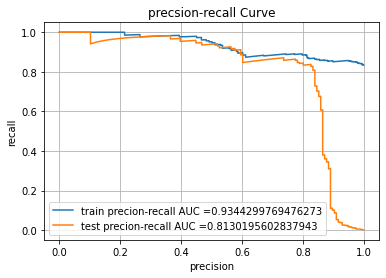

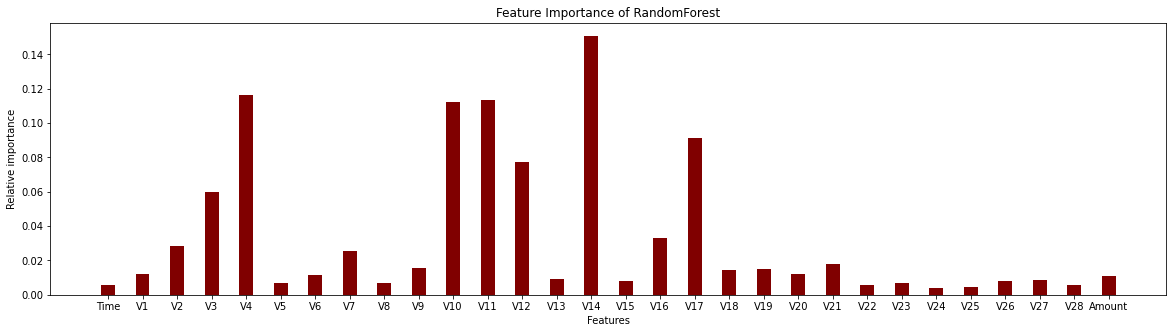

In [ ]:
classifier = RandomForestClassifier(class_weight='balanced',n_estimators= 200, min_samples_split= 5, min_samples_leaf = 4, max_samples = 0.3, max_features = 'sqrt', max_depth = 15,n_jobs=-1)
classifier.fit(x_train,y_train)

print_plot_metrics(classifier,x_train,x_test,y_train,y_test)

fig  = plt.figure(figsize=(20,5))
plt.bar(feature_names, classifier.feature_importances_, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Features") 
plt.ylabel("Relative importance") 
plt.title("Feature Importance of RandomForest") 
plt.show()

<h2><b>3.7 XGBoost

In [ ]:
start_time = datetime.now()

random_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

classifier = XGBClassifier(class_weight='balanced',n_jobs=-1)

randomCV = RandomizedSearchCV(classifier, param_distributions = random_grid, n_iter = 50, cv = 3,scoring = 'f1',n_jobs=-1,verbose
=10, random_state=42)

randomCV.fit(x_train, y_train)

print("Score from Best params : " ,randomCV.best_score_)
print("Best estimator found : ", randomCV.best_estimator_)
print("Best params found : ", randomCV.best_params_)
print("Time taken to run this cell :", datetime.now() - start_time)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 45

Score from Best params :  0.8555492887134174
Best estimator found :  XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              gamma=0.0, learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Best params found :  {'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0.0, 'colsample_bytree': 0.5}
Time taken to run this cell : 0:49:01.085929


┌─────────┬────────────────────┬────────────────────┬────────────────────┐
│ dataset │ Precision          │ Recall             │ F1_Score           │
├─────────┼────────────────────┼────────────────────┼────────────────────┤
│ Train   │                1.0 │                1.0 │                1.0 │
├─────────┼────────────────────┼────────────────────┼────────────────────┤
│ Test    │ 0.9197080291970803 │ 0.8076923076923077 │ 0.8600682593856656 │
└─────────┴────────────────────┴────────────────────┴────────────────────┘


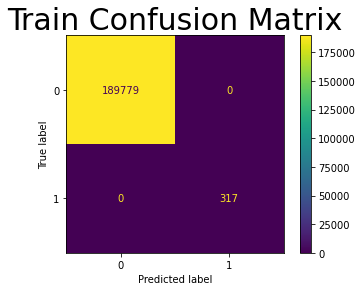

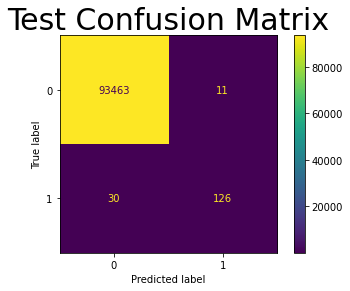

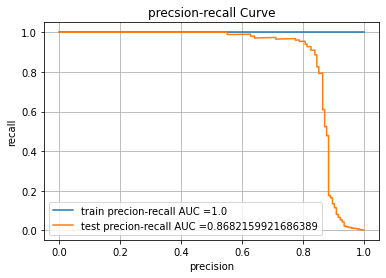

In [ ]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              gamma=0.0, learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, seed=42,
              silent=None, subsample=1,scale_pos_weight=587.235294118, verbosity=1)

classifier.fit(x_train,y_train)

print_plot_metrics(classifier,x_train,x_test,y_train,y_test)

┌─────────┬────────────────────┬────────────────────┬────────────────────┐
│ dataset │ Precision          │ Recall             │ F1_Score           │
├─────────┼────────────────────┼────────────────────┼────────────────────┤
│ Train   │                1.0 │                1.0 │                1.0 │
├─────────┼────────────────────┼────────────────────┼────────────────────┤
│ Test    │ 0.9097222222222222 │ 0.8397435897435898 │ 0.8733333333333333 │
└─────────┴────────────────────┴────────────────────┴────────────────────┘


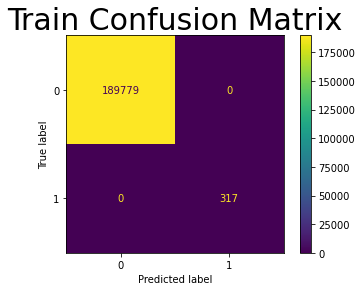

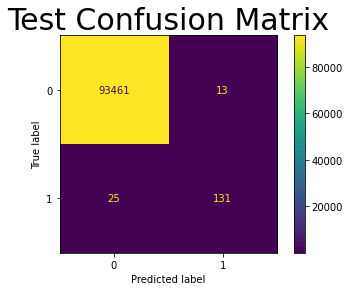

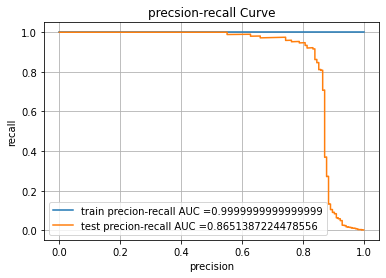

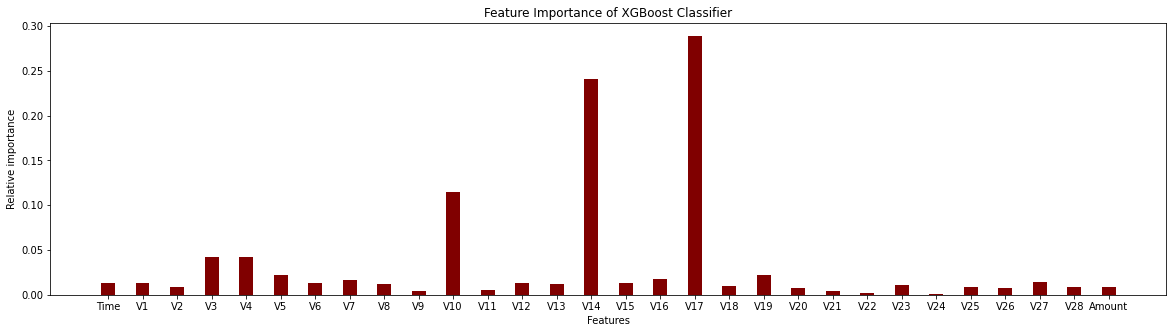

In [ ]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              gamma=0.0, learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=587.235294118, seed=42,
              silent=None, subsample=1, verbosity=1)

classifier.fit(x_train,y_train)

print_plot_metrics(classifier,x_train,x_test,y_train,y_test)

fig  = plt.figure(figsize=(20,5))
plt.bar(feature_names, classifier.feature_importances_, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Features") 
plt.ylabel("Relative importance") 
plt.title("Feature Importance of XGBoost Classifier") 
plt.show()

<h1><b>4. SUMMARY:

In [8]:
data = [['Model','dataset','Precision','Recall','F1_Score','AUC-Pre_Recall_Curve','Top 3 features'],
  ['Log Reg','Train',0.523,0.782,0.627,0.681,'V14,V17'],
  ['','Test',0.524,0.814,0.638,0.641,''],
  [],
  ['Linear SVM','Train',0.512,0.782,0.619,0.696,'V14,V17'],
  ['','Test',0.5,0.814,0.619,0.657,''],
  [],
  ['Random Forest','Train',0.882, 0.804, 0.841,0.934,'V14,V4,V10'],
  ['','Test',0.853, 0.782, 0.816, 0.813,''],
  [],
  ['XGBOOST','Train',1,1,1,0.999,'V17,V14,V10'],
  ['','Test',0.909,0.839,0.873,0.865,'']]

print(tabletext.to_text(data))

┌───────────────┬─────────┬───────────┬────────┬──────────┬──────────────────────┬────────────────┐
│ Model         │ dataset │ Precision │ Recall │ F1_Score │ AUC-Pre_Recall_Curve │ Top 3 features │
├───────────────┼─────────┼───────────┼────────┼──────────┼──────────────────────┼────────────────┤
│ Log Reg       │ Train   │     0.523 │  0.782 │    0.627 │                0.681 │ V14,V17        │
├───────────────┼─────────┼───────────┼────────┼──────────┼──────────────────────┼────────────────┤
│               │ Test    │     0.524 │  0.814 │    0.638 │                0.641 │                │
├───────────────┼─────────┼───────────┼────────┼──────────┼──────────────────────┼────────────────┤
│               │         │           │        │          │                      │                │
├───────────────┼─────────┼───────────┼────────┼──────────┼──────────────────────┼────────────────┤
│ Linear SVM    │ Train   │     0.512 │  0.782 │    0.619 │                0.696 │ V14,V17        │


<h1>We can see that the <b>Random Forest</b> perfomed very well compaired to other models.